<a href="https://colab.research.google.com/github/flaviovdf/musica/blob/main/exemplos/decomp-ex-svd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Descomente para executar no collab
# ! pip install git+https://github.com/flaviovdf/musica.git

  Cloning https://github.com/flaviovdf/musica.git to /tmp/pip-req-build-oad34fiu
  Running command git clone -q https://github.com/flaviovdf/musica.git /tmp/pip-req-build-oad34fiu
     |████████████████████████████████| 207 kB 4.2 MB/s 
     |████████████████████████████████| 126 kB 45.9 MB/s 
     |████████████████████████████████| 65 kB 3.6 MB/s 
  Created wheel for musica-dcc-ufmg: filename=musica_dcc_ufmg-0.1-py3-none-any.whl size=3413 sha256=20ebd1d5a8be0cba6d4c6c4bbf5aa8e4eae4a7a7c181ec6858844b42cfe22708
  Stored in directory: /tmp/pip-ephem-wheel-cache-v3xy66bw/wheels/94/cb/e0/72e4ee72153bf78a970722ac92a93e8a8f31c1853e32a3d1bc
Successfully built musica-dcc-ufmg


In [2]:
from μsica import μsf
from μsica import μsp

import flax.linen as nn
import jax.numpy as jnp
import jax

import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import optax
import os
import pandas as pd
import urllib

In [3]:
μsf.download('http://dcc.ufmg.br/~flaviovdf/mir/examples/drum.wav', 'drum.wav',
             False)

drum.wav: 331kB [00:05, 59.2kB/s]


In [4]:
μsp.init_matplotlib()
plt.ion()

In [5]:
wav, sr = librosa.load('drum.wav')

In [6]:
import IPython.display
IPython.display.Audio(wav, rate=sr)

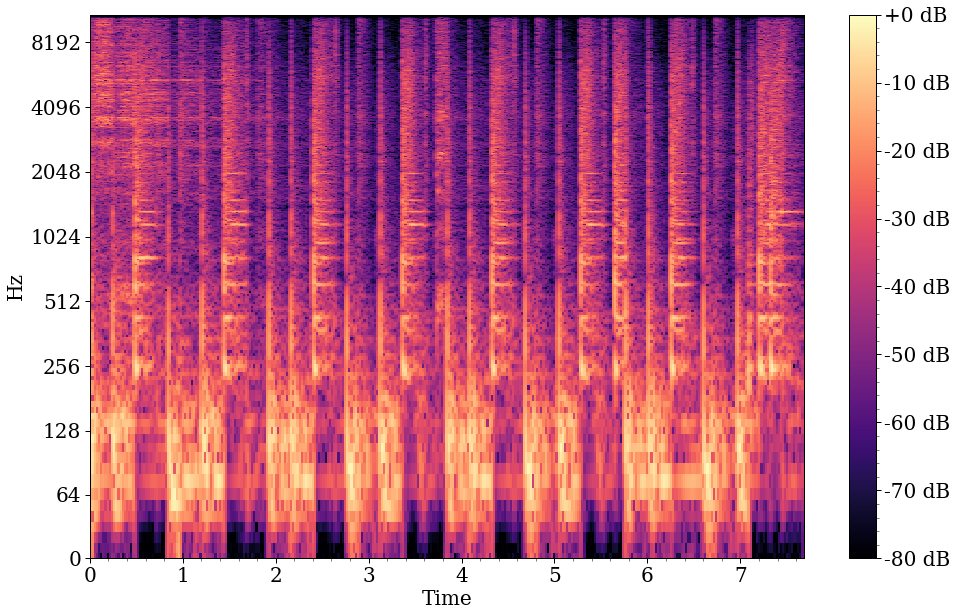

In [7]:
S = librosa.stft(wav)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB");

In [8]:
@jax.jit
def svd_loss(Us, Vh, X):
    X_model = Us.dot(Vh)
    return jnp.mean((X - X_model) ** 2)

In [21]:
k = 5
Us = jnp.array(np.random.normal(size=(rows, k)))
Vh = jnp.array(np.random.normal(size=(k, cols)))

lr = 10
for i in range(5000):
    Us_prime, Vh_prime = grad_fn(Us, Vh, X)
    Us = Us - lr * Us_prime
    Vh = Vh - lr * Vh_prime
    if i % 100 == 0:
        print(i, svd_loss(Us, Vh, X))

0 14.365188
100 3.6791346
200 2.3307145
300 2.1967776
400 1.9291978
500 1.7156274
600 1.6235996
700 1.5742407
800 1.5390729
900 1.5160332
1000 1.5029532
1100 1.4960377
1200 1.492349
1300 1.4902334
1400 1.4888772
1500 1.4879004
1600 1.4871275
1700 1.486477
1800 1.4859086
1900 1.4854023
2000 1.4849464
2100 1.4845338
2200 1.4841596
2300 1.4838201
2400 1.4835123
2500 1.4832335
2600 1.4829811
2700 1.482753
2800 1.4825473
2900 1.4823619
3000 1.4821948
3100 1.4820447
3200 1.4819098
3300 1.4817888
3400 1.4816804
3500 1.4815832
3600 1.4814962
3700 1.4814187
3800 1.4813492
3900 1.4812872
4000 1.4812319
4100 1.4811825
4200 1.4811385
4300 1.4810994
4400 1.4810644
4500 1.4810331
4600 1.4810054
4700 1.4809808
4800 1.4809588
4900 1.4809391


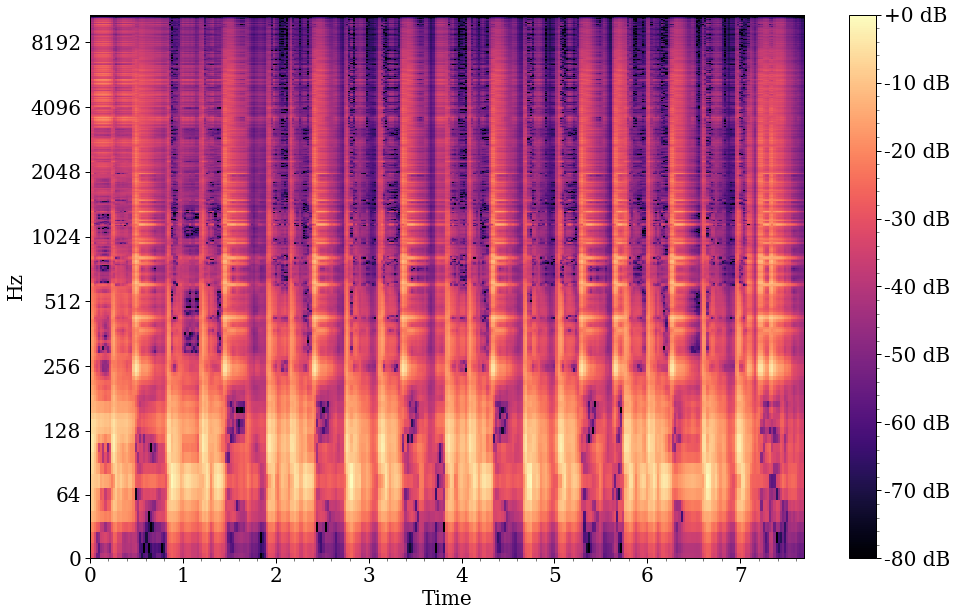

In [22]:
S_model = Us.dot(Vh)
S_db_model = librosa.amplitude_to_db(S_model, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db_model, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB");

In [31]:
k = 5
W = jnp.array(np.random.uniform(size=(rows, k)))
H = jnp.array(np.random.uniform(size=(k, cols)))

lr = 10
for i in range(5000):
    W = W * ((X @ H.T) / (((W @ H) @ H.T) + 0.0001))
    H = H * ((W.T @ X) / (((W.T @ W) @ H) + 0.0001))
    if i % 100 == 0:
        print(i, svd_loss(W, H, X))

0 5.7043242
100 1.5068434
200 1.4956318
300 1.4947675
400 1.494307
500 1.4941345
600 1.4938968
700 1.4938362
800 1.4938059
900 1.4937847
1000 1.4937729
1100 1.493754
1200 1.493743
1300 1.4937383
1400 1.4937271
1500 1.4937221
1600 1.4937208
1700 1.49372
1800 1.4937173
1900 1.4937137
2000 1.4937123
2100 1.4937109
2200 1.4937091
2300 1.4937072
2400 1.4937062
2500 1.4937057
2600 1.4937054
2700 1.4937052
2800 1.493705
2900 1.493705
3000 1.493705
3100 1.493705
3200 1.4937049
3300 1.4937048
3400 1.4937049
3500 1.4937049
3600 1.4937049
3700 1.4937048
3800 1.4937049
3900 1.4937049
4000 1.4937048
4100 1.4937048
4200 1.4937048
4300 1.4937048
4400 1.4937049
4500 1.4937049
4600 1.4937048
4700 1.4937048
4800 1.4937049
4900 1.4937049


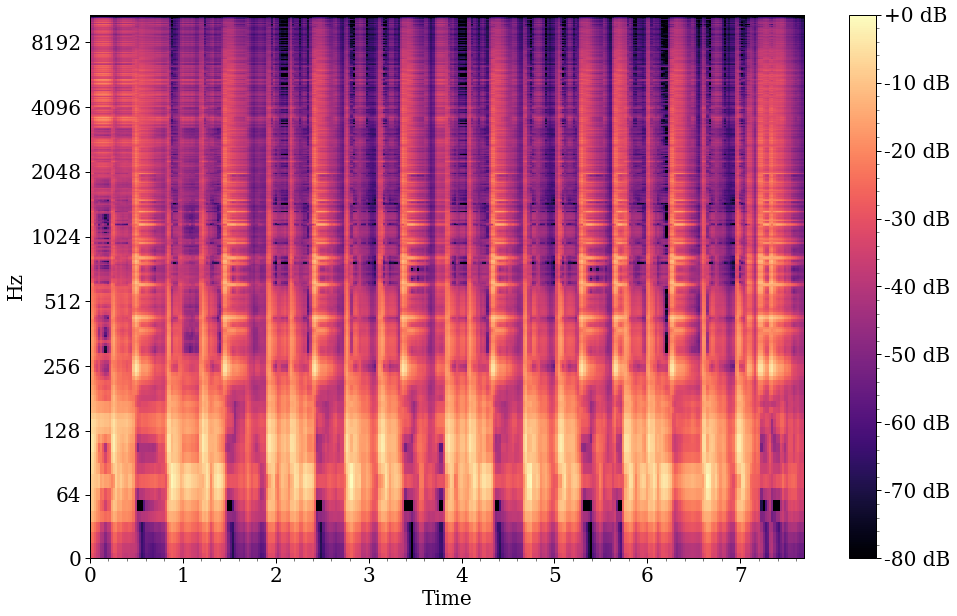

In [32]:
S_model = W.dot(H)
S_db_model = librosa.amplitude_to_db(S_model, ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(S_db_model, x_axis='time', y_axis='log', ax=ax)
fig.colorbar(img, ax=ax, format="%+2.f dB");

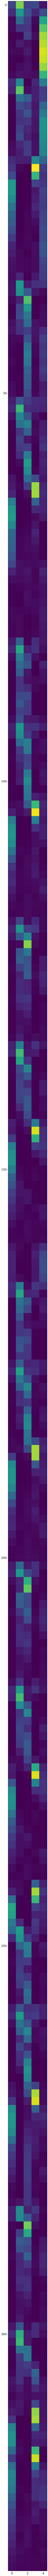

In [42]:
fig, ax = plt.subplots(figsize=(200, 320))
ax.imshow(H.T);

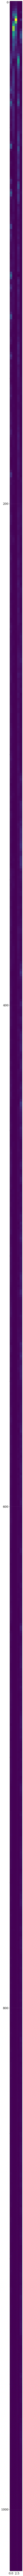

In [41]:
fig, ax = plt.subplots(figsize=(200, 320))
ax.imshow(W);